# Data Base Breach Analysis

@mttwdevelops

August 11, 2022

**Data Source**: https://en.wikipedia.org/wiki/List_of_data_breaches

**Source Scraper**: https://github.com/mttwdevelops/Practice-Files/blob/master/Data_Breach_Analysis/db_breach_webscrape.py

The topic of this analysis is on largely-public database breaches recorded between the years of 2004 to now. 

The scope of this analysis is to look at different variables from the data such as *Organization type*, *Method*, *Records*, and *Year* to identify any common patterns or interesting outliers, and propose ways that consumers can minimize further leaks of their consumer data.

It is important that I stress that one can *minimize* the ways that one can be hacked but whether or not an entity gets hacked is often out of the hands of just a single consumer. This means that one cannot *entirely prevent* getting their personal information leaked, unless they exist totally "off the grid." Understandably, this is extremely difficult to do in the current age, as most social interaction, payments, and way of life is hosted entirely online.

The scraper file is provided above, and can be run at any time before running this file to get an up-to-date listing of publically-published data breaches. 

For any further questions on the data source's sources, refer to the provided **Data Source** link provided.

In [1]:
# Libraries imported:
import matplotlib.pyplot as plt
from natsort import natsorted
import seaborn as sns
import pandas as pd
import numpy as np
# import re
from re import search

In [2]:
# Importing the data (refer to db_breach_webscrape.py):
df = pd.read_csv("databreachleaks.csv")
df.head()
# df.describe

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


It seems that we have extra columns named "Unnamed: 0" and "Sources." Again, any questions on the data source's sources (public articles, press reports, news releases, etc.)can be found from the **Data Source** link.

Let us fix that now.

In [3]:
df.drop(columns = ["Unnamed: 0", "Sources"], axis = 1, inplace = True)
# the inplace setting means we don't have to reassign df
list(df.columns)

['Entity', 'Year', 'Records', 'Organization type', 'Method']

## Exploratory Data Analysis

In [4]:
# Let us look at the different methods of breaches
print(df["Method"].unique())
df["Method"].value_counts()
df.dtypes

['hacked' 'poor security' 'lost / stolen media' 'accidentally published'
 'inside job, hacked' 'lost / stolen computer' 'unknown'
 'unsecured S3 bucket' 'inside job' nan 'accidentally uploaded'
 'poor security / hacked' 'Poor security' 'unprotected api'
 'poor security/inside job' 'data exposed by misconfiguration'
 'zero-day vulnerabilities' 'intentionally lost'
 'misconfiguration/poor security' 'ransomware hacked' 'rogue contractor'
 'improper setting, hacked' 'hacked/misconfiguration'
 'publicly accessible Amazon Web Services (AWS) server'
 'accidentally exposed' 'social engineering']


Entity               object
Year                 object
Records              object
Organization type    object
Method               object
dtype: object

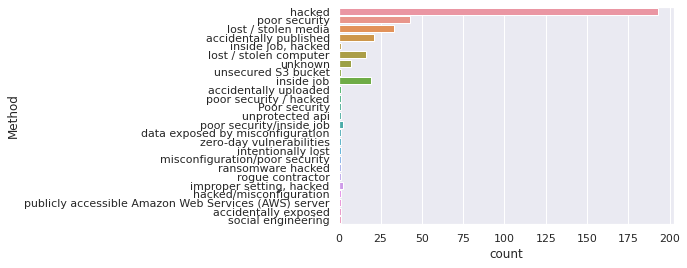

In [5]:
# Method
sns.set(style = "darkgrid")
ax = sns.countplot(y="Method", data = df)

I find this very interesting that nearly twenty or so breach cases are inside jobs. The others, such as being hacked or poor security and losing a company laptop are not too surprising, but perhaps the inside job should be looked at from a case-by-case basis.

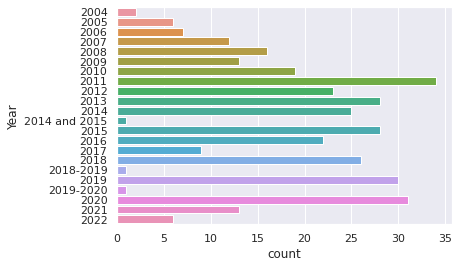

In [6]:
# Year
df["Year"].unique()
df["Year"] = natsorted(df["Year"])
ax = sns.countplot(y="Year", data = df)

In [7]:
# Organization type
df["Organization type"].unique()
df["Organization type"].value_counts()

## Included code for testing
# org_count = pd.DataFrame(data = x, columns=["Org_Type", "Count"])
# org_count.columns = ["Org_Type", "Count"]
# print(org_count)
# ax = sns.countplot(y="Organization type", data = df) 
# print(org_count[1]) # returns 47
# print(org_count.values)
# print(org_count)
# org_count = org_count.rename(columns = {"OrgType" : "Organization Type", "Count" : ""})
# org_count.dtypes
# ax = sns.countplot(data = x)
# print(list(org_count.columns))

web                           53
healthcare                    47
financial                     38
government                    30
retail                        27
                              ..
humanitarian                   1
special public corporation     1
shopping                       1
local search                   1
various                        1
Name: Organization type, Length: 70, dtype: int64

<AxesSubplot:xlabel='Records', ylabel='Density'>

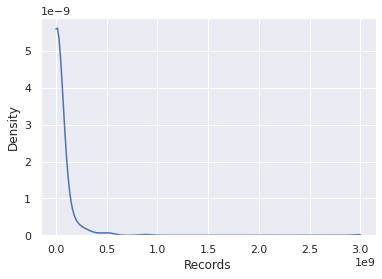

In [8]:
# Records
df["Records"].unique()
df_records_num = pd.to_numeric(df["Records"], errors = "coerce")
# df_records_num = df.loc[df.Records.isnumeric()]
df_records_num.describe
sns.kdeplot(data = df_records_num, cut=0) # NOT DONE!!!

We should note that the previous plot's scale is in billions, so 0.5 along the y-axis is equal to 500 million.

Essentially, the graph notes that an overwhelming amount of the breaches have individually leaked less than 500 million records.

While looking at the data source as a table, I found it unsurprising that categories such as governments, financial services, and healthcare comapnies would cover a large portion of breaches, evident from the *Organization Type* variable's count listing. These breached records would contain information regarding typically older demographics, such as adults and the elderly, most of whom with established credit and medical histories. This would be valuable, uniquely-identifiable information for identity theft. Government leaks are typically specific weapons, combat, or organizational documents, often released through Wikileaks.

What I did find interesting is not only the number of breaches but how much data comes from social media and entertainment sector leaks.

We will look at that later on, but for now let's dive into the numbers of records leaked.

In [9]:
df["Organization type"].value_counts()
df.head()
df_records_calc = df
df_records_calc["Records"] = pd.to_numeric(df["Records"], errors = "coerce")
record_agg = df_records_calc.groupby(["Organization type"]).agg({"Records" : "sum"})
display(record_agg.to_csv("./org_type_aggreg_leak.csv"))

record_agg.head()

None

,Records
Organization type,
Clinical Laboratory,11900000.0
Consumer Goods,150000000.0
Information Security,0.0
Network Monitoring,0.0
QR code payment,20076016.0


There is now a *org_type_aggreg_leak.csv* file that is available. This contains the previous table but in its entirety if you are interested. 

I did set any non-numerical values in the *Records* column to 0.0, for instance, when referring to the original table, the "unknown" value would become 0.0.

Non-numeric values are:
- unknown / undisclosed
- Source code compromised
- Leaked data volumes (in GB / TB / stores)
- Category of individuals (G20 world leaders)

Looking at the file, I notice a few different categories of services that can be aggreggated together further. Let me handle that here.

In [10]:
record_agg = pd.read_csv("./org_type_aggreg_leak.csv")

# Testing how to access individual records
print(record_agg.iloc[0,:]["Records"]) # prints the first record's total
print(record_agg.loc[0, "Organization type"])
# print(record_agg.iloc[0,:]["Name"])

# This returns the total records leaked for all organizations
total = 0
for i in range(len(record_agg)):
    total += record_agg["Records"][i]

print(total)


11900000.0
Clinical Laboratory
13363731650.0


In [13]:
# String Search to Total Records Calculator
numb = 0
for i in range(len(record_agg)):
    if record_agg["Organization type"][i].__contains__("retail"):
        # print(i) # used to check index, but need to add +2 per index when looking at org_type_aggreg_leak.csv
        numb += int(record_agg.iloc[i,:]["Records"])
        
print(numb) 

# 13,363,731,650+ total records leaked
# 109,013,224 military records leaked
# 1,866,716,083 healthcare records leaked
# 204,973,989+ gaming or gambling records have been leaked
# 1,298,870,304+ social media records leaked
# 5,262,559,516+ web records leaked, some of which are other social media and retail sites
#   but will be left as separate categories for simplicity


384707972


In [12]:
# For Insider job analysis (Method)
df_insider = df 
df_insider["Records"] = pd.to_numeric(df_insider["Records"], errors = "coerce")
display(df_insider.to_csv("./df_insider.csv"))

numb = 0
for i in range(len(df_insider)):
    if search("social engineering", str(df_insider["Method"][i])):
        try: 
            numb += int(df_insider.iloc[i,:]["Records"])
        except:
            numb += 0
print(numb)

## For testing purposes
# print(type(df["Method"][10]))
# print(len(df))
# df_insider.iloc[10,:]["Records"]


None

6054459


I used the previous block of code to search for record leak subtotals within the dataframe for various industries. This returns some interesting results.

The total of social media and gaming / gambling leaks is quite high, simple math shows that roughly over eleven percent of total leaked records stem from those two industries alone. 

## Findings and Explanations

As this is the notebook and not the condensred report found from the project's readme.md, I will include a lot more digging and leads than what will appear on the readme. Not everything found here will be immediately actionable, but rather may be either interesting observations or patterns that may warrant further analysis and research in the future.

### Shopping for Handbags and Account Information

There appears to be 384,707,972 retail records that have been leaked, with about a third of them coming from Target's 2013 massive breach. This includes about 40 million accounts with credit and debit card information. The hack appears to have happened due to third-party vendor access accidentally allowing access to Target's own personal network, although credit card chip issues appear to also be at fault. Credit card chip technology has advanced since the breach, although with contactless cards, neither pins nor signatures are required. This means that physical access to the card is key, although some card companies impose dollar limits for tap payments. 

TJ Maxx comes in with the second largest leak (supposed largest at the time in 2007) at 94 million records, again with 47.5 million credit and debit cards' information leaked, along with even [driver's license numbers](https://www.nbcnews.com/id/wbna17871485). The culprit? Breacking into the company's Local Access Network (LAN), which was not hard to do due to the company using Wired Equivalent Privacy, which is considered weak for wireless networks.

The big takeaways?
1. Cash is king.
2. Avoid creating accounts with big retailers. You give them your address, credit card information, occasionally at the expense of getting it hacked; doesn't sound like a good deal.

### Year-Over-Year Hack Counts

#### 2011: The Year of the Hacks

It comes as no surprise that as time goes on and as the internet keeps growing, more data breaches happen; however, 2011 appears uniqely to have nearly double (except 2004 - 2005) the breaches as its previous year.

Notable breaches of this year include plenty of healthcare companies, such as Health Net, NHS, and Tricare, but by far the largest was in the entertainment sector: the infamous PlayStation Network outage along with Steam, Tianya Club, Nexon Korea Corp, Sega, Bethesda, and several Chinese gaming websites all having well over 150 million accounts compromised. Most of these breaches originate from hacks, although the healthcare sector was consistently compromised from lost / stolen computers and media. 

#### Every Four Years, And Then A Dip?

As most of the breaches in the database are from American entities, it would seem likely that American events, such as its elections, would also be prime targets for hackers. Looking at the year-over-year chart in the EDA section - it seems that 2008, 2016, and 2020, all of which are major election years - see more breaches than their following years, 2004 and 2012 being the exception.

2012 had major financial breaches, such as 7-Eleven and the Nasdaq reportedly leaking over 160 million entries, along with TD Bank, Global Payments, and banks in Iran also being hacked. 

2016 notably had a leak from the Democratic National Committee, which contained documents regarding the Clinton's (the Democratic nominee) internal deliberations. On this note, it can be believed that much more cyber-attacks are done on politicians than what is given in the table, which would require a lot more digging and analysis. Perhaps in the future.

Besides these leaks, the dataset surprisingly does not feature immediately-related breaches to elections or potential government policy.

### The Inside Jobs

Insider jobs, or when an individual inside an entity, either willingly or un/knowingly releases internal information, either through documents, cached customer records, or otherwise. This means that not all of the records that fall under the "inside job" category are malicously released, in fact, besides the previously mentioned Wikileaks government and military document releases, police filings and other government documents are often published unintentionally.

Of course, there are instances of financial incentives, such as the largest inside job within the dataset: AOL's database leak in 2004. __[This databreach](https://money.cnn.com/2004/06/23/technology/aol_spam/)__ occured from a software engineer whole stored a list comprising of 92 million AOL customers usernames and sold them for advertising purposes. Other similar cases include 20 million entries from the South Korean Credit Bureau, and 2.5 million entries from Countrywide Financial Corp.

But what I find most interesting are the moral reasons why an inside job happens. One that can be found within the data source is from Wikileaks, a 'public service' website that posts government documents meant to educate journalists, activists, and the general public on any internal government (typically US) activities. Or rather, insider "whistleblowers" release these documents to Wikileaks, who verify and publish them online. These entries can take up a smaller number of records, with the U.S. Army's classified Iraq War documents and embassy cables leaks totaling to only 0.52% of 'inside job' records. 

As this style of leaking information can happen for a number of different reasons and methods, prevention is a challenge. Preventing external device connection in entity computer systems, leadership training and commitment to their teams, and constant auditing seem to be ways to help mitigate potential 'retaliation,' but realistically stopping whistleblowing entirely would mean authoritarian-extreme measures in the workplace. 

### Socially Engineered Into Your Systems

Another interesting breach method is social engineering, where an employee of an entity is psychologically manipulated into divulging sensitive information or performing actions in favor of an intruder. In __[this case](https://www.cyberscoop.com/social-engineering-hack-judge-rules-poor-contract-wont-save-american-hosting-company-lawsuits/)__, someone was able to convince the hosting service of an online community website xat.com to be added to the website's own account (on the host) and take control of their servers, downloading account information, and then finally then wipe them. This attack resulted in over 6 million data records to be leaked.

Social engineering tends to be known from specific examples such as phishing attacks, scareware, and online impersonation. 

Some recommendations to combatting social engineering include:
1. Use multi-factor authentication when using any online account. Scammers may have your password, but if they do not have access to authorize your account through your set up authenticator application, then they cannot get access to that account - still change your password though.
2. Be skeptical of every link in an email. If an email is asking for you to log into your account and they include a link, it's often just better to navigate to the site with a link you have used before or looking up the website and navigating to it rather than clicking links. In that regard, **be skeptical of every email you get..**
3. Use common sense. Often times, you don't even need any external antivirus software if you exercise a health dose of common sense.
4. **Often times scammers can specifically target individuals to scam based off of publicly-available information, such as where you work, live, or who you associate with. This is called Spear-Phishing. Be cautious of what you put online, even showing up in an old photo wearing a shirt with a company's logo can be used to identify you. Scammers are creative, great hackers moreso than what you can expect.**

### The Facebook Problem

Yes, this is the part of any security / privacy report that tells you to get rid of Facebook.

Of any company, Facebook (now Meta), has had over 1,064,500,000 records leaked since 2013 within five different breaches, with __[Statista reporting](https://www.statista.com/statistics/272014/global-social-networks-ranked-by-number-of-users/)__ that Facebook still has over 2.9 billion monthly active users worldwide, with them also owning WhatsApp, Instagram, and Facebook Messenger (also highly used social media platforms). These breaches stem from two different ways: poor security, and records being "accidentally published." It should be noted that from the collected publicly-sourced data, Facebook leaked records are ***two-thirds*** of total social media record leaks since 2004.

Facebook being hacked does not come as a surprise, as it contains as a single entity the largest registry of publically-volunteered information collection on a significant portion of the entire world's population. This social platform transcends international borders, collecting email addresses, phone numbers, and location data while also performing __[facial recognition](https://web.archive.org/web/20160605165148/http://www.theregister.co.uk/2015/11/10/facebook_scans_camera_for_your_friends/)__, __[snooping on phone calls and texts not made on Facebook through "metadata"](https://www.theguardian.com/technology/2018/mar/25/facebook-logs-texts-and-calls-users-find-as-they-delete-accounts-cambridge-analytica)__, among *many* other intrusive instances found __[here](https://stallman.org/facebook.html#privacy)__.

These actions to gather massive amounts of data on individual users, coupled with Facebook's record of being hacked, is a prime example of the social trend of temporary convenience over true security along with the commercialization of social connection. 

Arguments against purging Facebook come from the idea of its convenience, while true, comes at a significant price. 

There are a few recommendations I propose in its place:
1. Switching to SMS / texting. While any company that deals with anything related to cell-phones are not to be trusted either, as they provide your information to the government (as evidenced from Edward Snowden's leaks and even further back), removing any potential points of privacy-failure is better. **Side note: it would be ideal to use a gpg-encrypted messaging app instead of SMS, but regardless removing any separate-entity traces of your data is better than none.** Before deleting social media, privately offer any connection on social media your contact information, if they never reach out after, then that connection was never meant to be.
2. Being much more conscious and careful about what you put online. Even "spoofing," or faking personal information is okay, but these social media apps still collect your geolocation and sell them to third-parties. This is often stipulated in the Terms of Service (ToS) that you also often skip reading. Faking specific account information but linking it to an email that contains your true identifiable information is a bit awash.